# Background & Context
Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.
Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.
As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

# Objective
1.	Explore and visualize the dataset.
2.	Build a linear regression model to predict the log of rental price
3.	Generate a set of insights and recommendations that will help the business.

# Data Dictionary 
1. id:	                       Property ID
2. room_type:	               Type of Room in the property
3. accommodates:	               How many adults can this property accomodate
4. bathrooms:	               Number of bathrooms in the property
5. cancellation_policy:	       Cancellation policy of the property
6. cleaning_fee:	               This denotes whether the property's cleaning fee is included in the rent or not
7. instant_bookable:	           It indicates whether an instant booking facility is available or not
8. review_scores_rating:	       The review rating score of the property
9. bedrooms:	                   Number of bedrooms in the property
10. beds:                   Total number of beds in the property
11. log_price:	               Log of the rental price of the property for a fixed period 


# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy.stats as stats

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

# IMPORTING DATASET

In [2]:
Data = pd.read_csv("AirBNB-SA-13447-2-2.csv")
Data.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [4]:
Data.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


Here, it is clear that we have 4 cateogorical columns.
Lets explore it further

## CHECKING FOR MISSING VALUES

In [5]:
Data.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [6]:
# counting the number of missing values per row
Data.isnull().sum(axis=1).value_counts()

0    57119
1    16868
2       76
3       44
4        4
dtype: int64

In [7]:
print("% of Mising values in review_score_rating column")
16722/74110

% of Mising values in review_score_rating column


0.2256375657805964

Here, it can be seen that there are highest number of missing values in review score rating column i.e 22% lets remove the column.

## DEALING WITH MISSING VALUES

In [8]:
Data.drop(['review_scores_rating'], axis=1, inplace=True)

In [9]:
# most rows don't have missing values now
num_missing = Data.isnull().sum(axis=1)
num_missing.value_counts()

0    73752
1      278
2       75
3        6
dtype: int64

In [10]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = Data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        

For the rows with exactly 1 missing values, NAs are found in:
room_type                5
bathrooms              152
cancellation_policy      1
bedrooms                61
beds                    59
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
bathrooms              45
cancellation_policy     4
cleaning_fee            4
bedrooms               28
beds                   69
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
accommodates           3
bathrooms              6
cancellation_policy    3
bedrooms               3
beds                   3
dtype: int64





This confirms that certain columns tend to be missing most in bathrooms, bedrooms and beds. How exactly we handle this will depend on what we're doing. We will likely to drop the particular rows as they are really less.


In [11]:
# now using `fillna` with a numeric column
print(Data['bathrooms'].isnull().sum())
Data['bathrooms'].fillna(Data['bathrooms'].mean(), inplace=True)  # mean imputation
Data['bathrooms'].isnull().sum()

203


0

In [12]:
print(Data['bedrooms'].isnull().sum())
Data['bedrooms'].fillna(Data['bedrooms'].mean(), inplace=True)  # mean imputation
Data['bedrooms'].isnull().sum()

92


0

In [13]:
print(Data['beds'].isnull().sum())
Data['beds'].fillna(Data['beds'].mean(), inplace=True)  # mean imputation
Data['beds'].isnull().sum()

131


0

In [14]:
# replacing NaN values with 0
Data.fillna(0, inplace=True)

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
Data = Data[Data.room_type != 0]
Data = Data[Data.cancellation_policy != 0]
Data = Data[Data.accommodates  > 0]
Data.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,0.0,1.0,4.744932


In [15]:
Data.isnull().sum()

id                     0
room_type              0
accommodates           0
bathrooms              0
cancellation_policy    0
cleaning_fee           0
instant_bookable       0
bedrooms               0
beds                   0
log_price              0
dtype: int64

# UNIVARIATE ANALYSIS - NUMERICAL VARIABLES

In [16]:
#univariate analysis - numerical columns
def histogram_boxplot(feature, figsize=(15,9), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.15, .50)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='lightcoral') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette ="terrain") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram



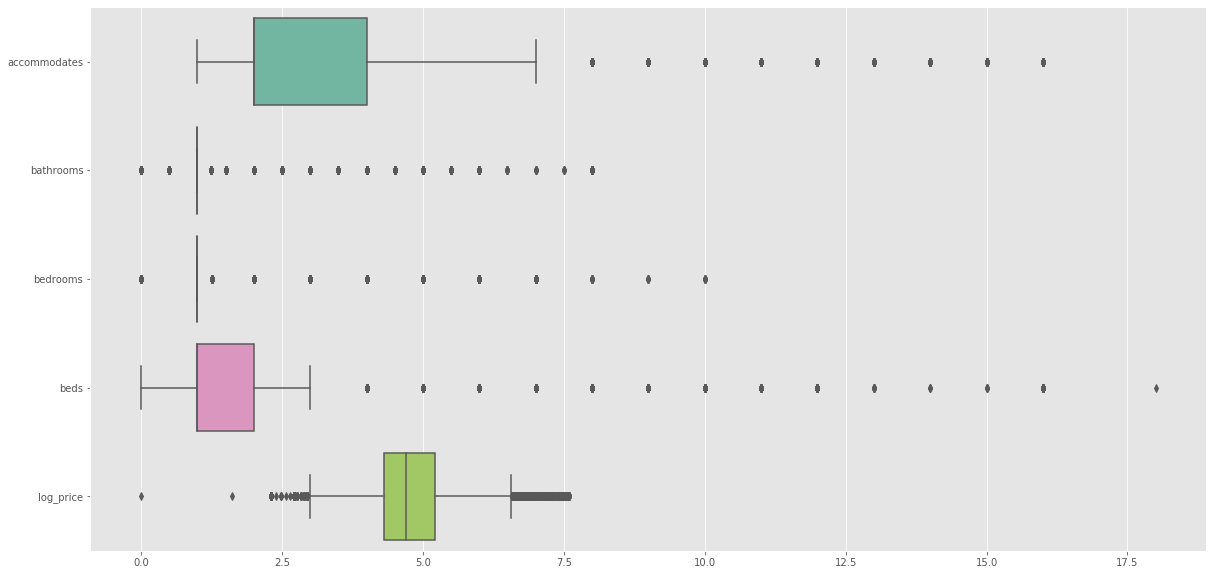

In [17]:
Data.describe()
data_2 = Data[['accommodates', 'bathrooms', 
                  'bedrooms',
       'beds', 'log_price']]
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=data_2, orient="h", palette="Set2",)


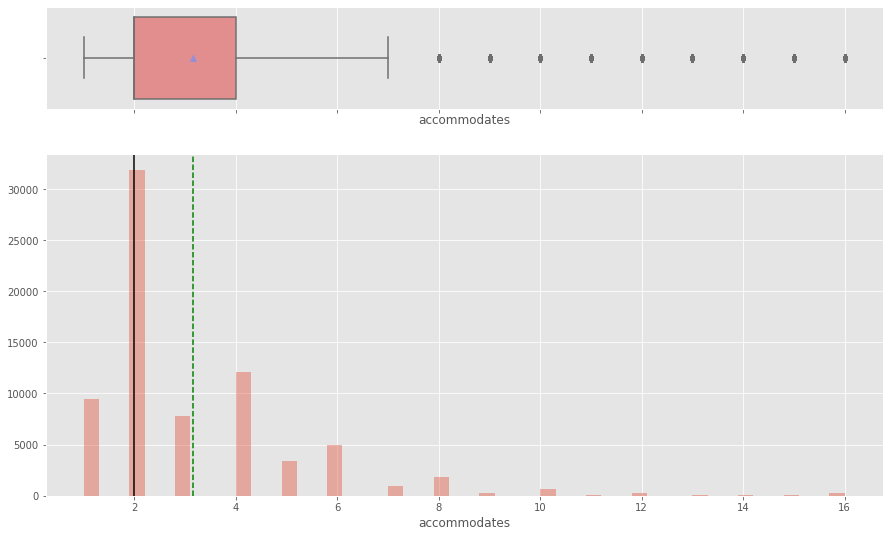

In [18]:
histogram_boxplot(Data['accommodates'])

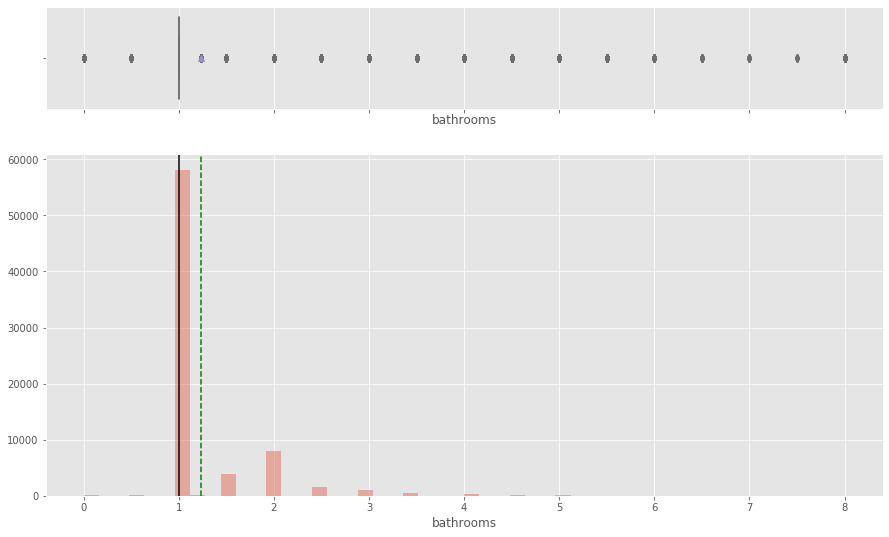

In [19]:
histogram_boxplot(Data['bathrooms'])

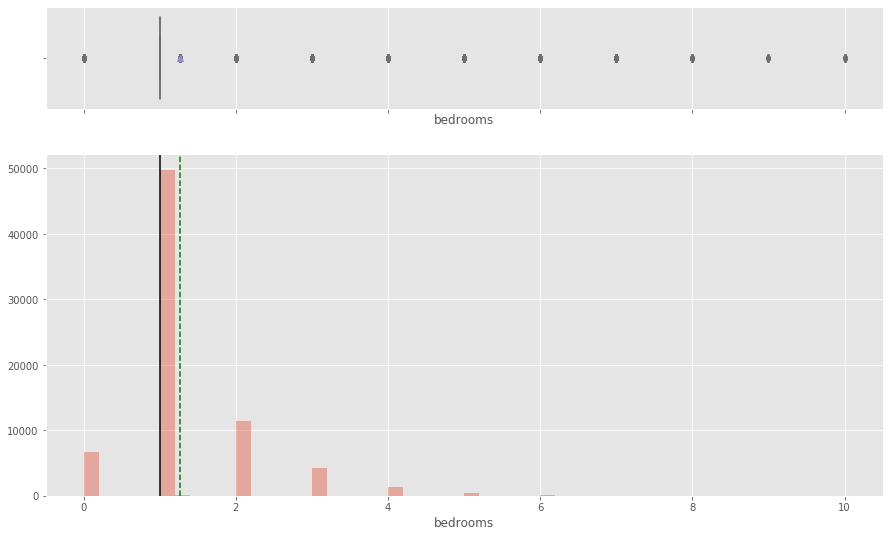

In [20]:
histogram_boxplot(Data['bedrooms'])

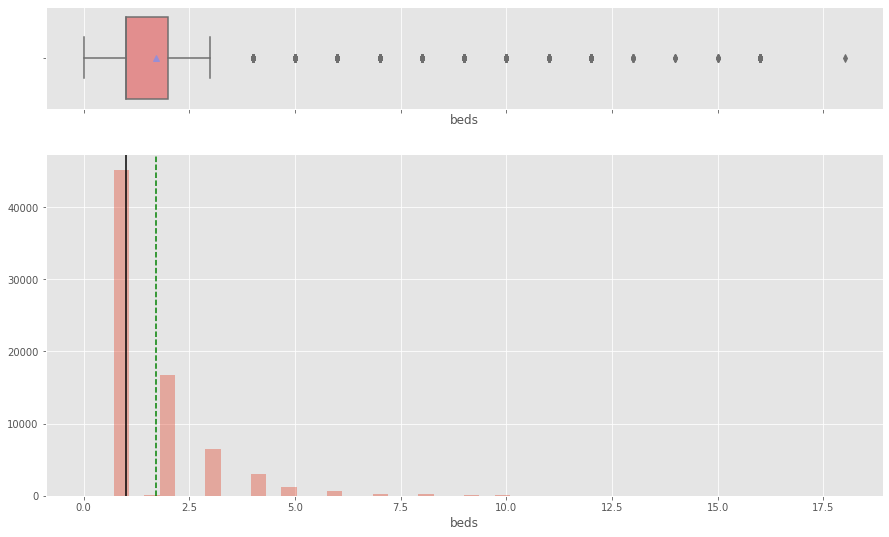

In [21]:
histogram_boxplot(Data['beds'])

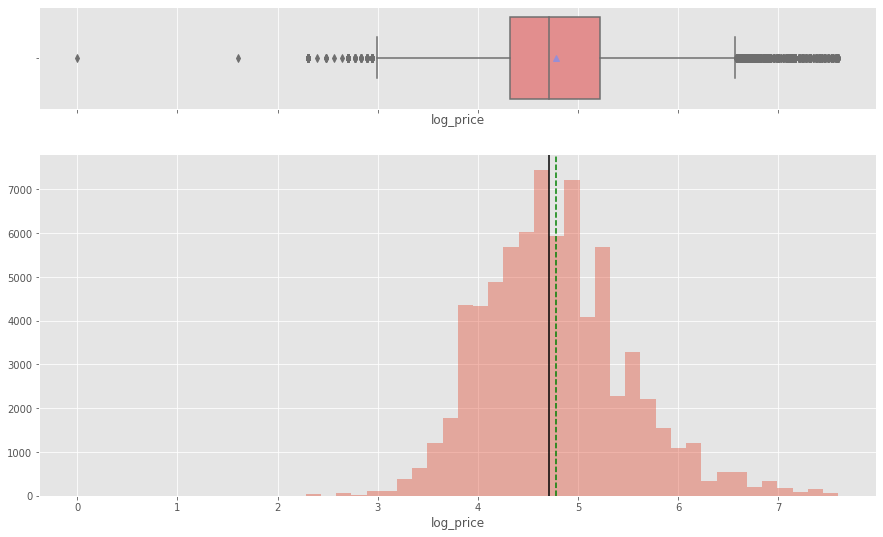

In [22]:
histogram_boxplot(Data['log_price'])

It can be seen from the above graphs that majority of properties accomodates only two people, However a few can be found which accomodates 1 - 3 to 16. The maximum number accomodated is 16.

Maximum number of properties have 1 bathroom, few can be found with 2 bathrooms too.

Majority of accomodation types have only 1 bedroom with a single or maximum double bed.



# UNIVARIATE ANALYSIS - CATEOGORICAL VARIABLES

In [23]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot



<class 'pandas.core.frame.DataFrame'>
Int64Index: 74098 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   74098 non-null  int64  
 1   room_type            74098 non-null  object 
 2   accommodates         74098 non-null  float64
 3   bathrooms            74098 non-null  float64
 4   cancellation_policy  74098 non-null  object 
 5   cleaning_fee         74098 non-null  object 
 6   instant_bookable     74098 non-null  object 
 7   bedrooms             74098 non-null  float64
 8   beds                 74098 non-null  float64
 9   log_price            74098 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 6.2+ MB


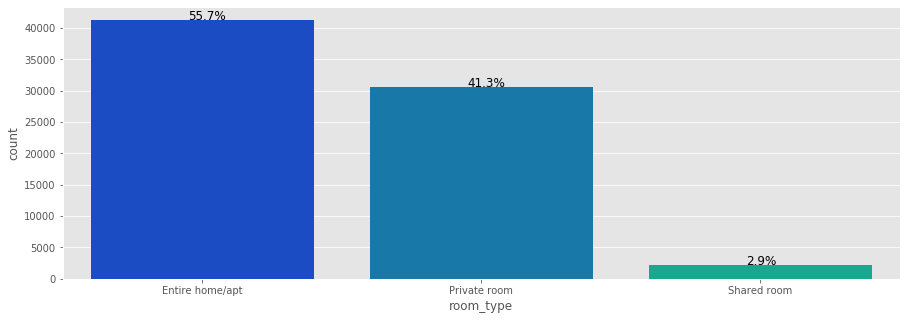

In [24]:
Data.info()
plt.figure(figsize=(15,5))
ax = sns.countplot(Data['room_type'],palette='winter')
perc_on_bar(ax,Data['room_type'])


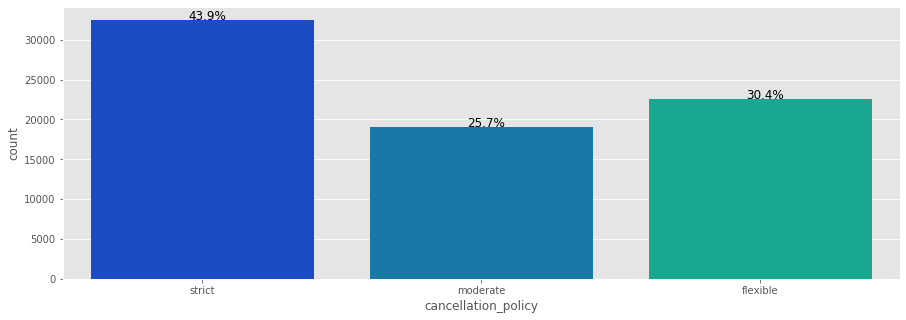

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(Data['cancellation_policy'],palette='winter')
perc_on_bar(ax,Data['cancellation_policy'])


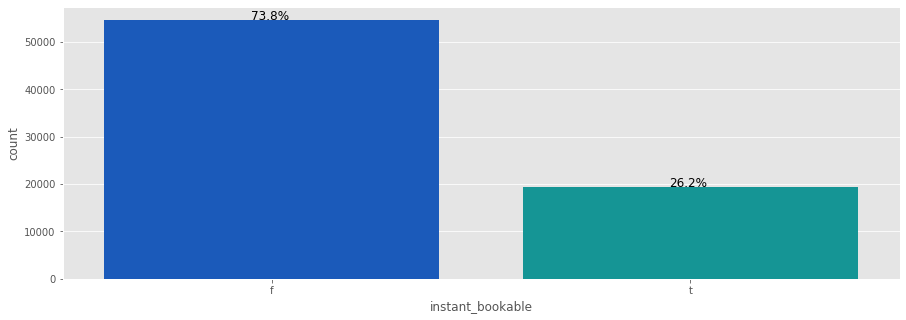

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(Data['instant_bookable'],palette='winter')
perc_on_bar(ax,Data['instant_bookable'])


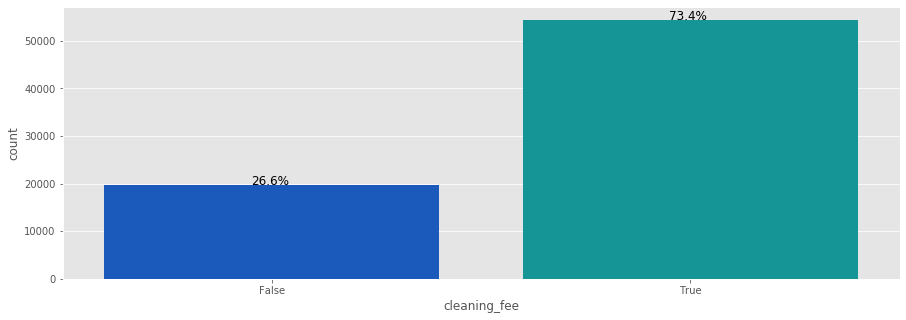

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(Data['cleaning_fee'],palette='winter')
perc_on_bar(ax,Data['cleaning_fee'])


It can be seen that 53% of listed properties are appartments while 48% are private rooms and only 3% are shared rooms.Also, 48% of property types are really strict with their cancellation policies, and can be seen that those are not available for instant bookings too.

80% of properties are charged for cleaning too.


# BIVARIATE ANALYSIS

,id,accommodates,bathrooms,bedrooms,beds,log_price
id,1.000000,-0.005767,-0.003941,-0.007541,-0.008635,-0.007133
accommodates,-0.005767,1.000000,0.505176,0.709129,0.809983,0.567627
bathrooms,-0.003941,0.505176,1.000000,0.589661,0.525339,0.355076
bedrooms,-0.007541,0.709129,0.589661,1.000000,0.709121,0.473069
beds,-0.008635,0.809983,0.525339,0.709121,1.000000,0.441802
log_price,-0.007133,0.567627,0.355076,0.473069,0.441802,1.000000


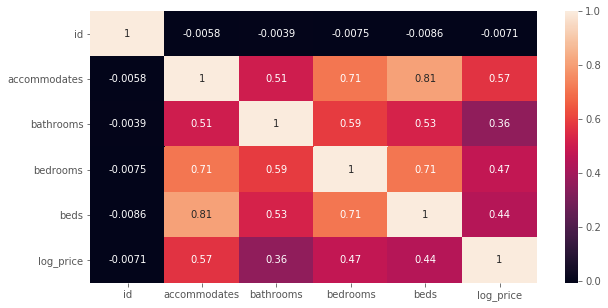

In [28]:
# The Correlation Matrix
plt.figure(figsize = (10,5))
corr = Data.corr()
corr = (corr)
sns.heatmap(corr, annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr


Room type seem to have a fair correlation with the log price. Also, it can be seen that no. of bedrooms and no. of beds have a good correlation with the no. of people the property can accomodate.


In [29]:
roomType_DF=Data.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF


,room_type,number_Of_Listings
0,Entire home/apt,41302
1,Private room,30633
2,Shared room,2163


In [30]:
room = Data.room_type
r = Counter(room)


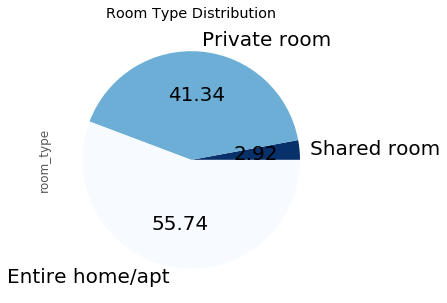

In [31]:
room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(5,5), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')


In [32]:
roomType_Price_DF = Data.groupby(['room_type']).log_price.mean()
roomType_Price_DF = roomType_Price_DF.reset_index()
roomType_Price_DF=roomType_Price_DF.sort_values('log_price',ascending=[0])
roomType_Price_DF.head()


,room_type,log_price
0,Entire home/apt,5.167260
1,Private room,4.327696
2,Shared room,3.861535


In [33]:
roomreview_Price_DF = Data.groupby(['room_type','accommodates']).log_price.mean()
roomreview_Price_DF = roomreview_Price_DF.reset_index()
roomreview_Price_DF=roomreview_Price_DF.sort_values('log_price',ascending=[0])
roomreview_Price_DF


,room_type,accommodates,log_price
15,Entire home/apt,16.0,6.211037
13,Entire home/apt,14.0,6.156099
11,Entire home/apt,12.0,6.144478
14,Entire home/apt,15.0,6.031929
9,Entire home/apt,10.0,5.946650
12,Entire home/apt,13.0,5.902728
30,Private room,15.0,5.896367
10,Entire home/apt,11.0,5.851879
31,Private room,16.0,5.825971
7,Entire home/apt,8.0,5.769640


From this analysis above we can easily state that renting an entire home or appartment is more costly than renting a private room or just a shared room

(3.5, -0.5)

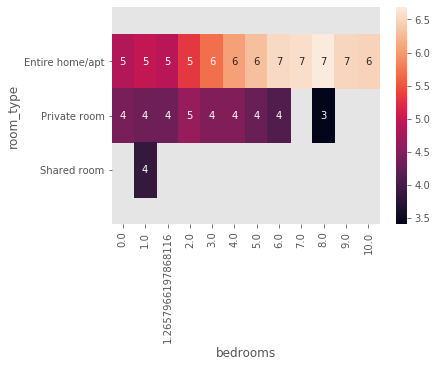

In [34]:
#Analysing how number of bedrooms affect the price of the listings
#HeatMap for variation of prices with number of bedrooms for listings
ax = sns.heatmap(Data.groupby(['room_type', 'bedrooms']).log_price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


(22.5, -0.5)

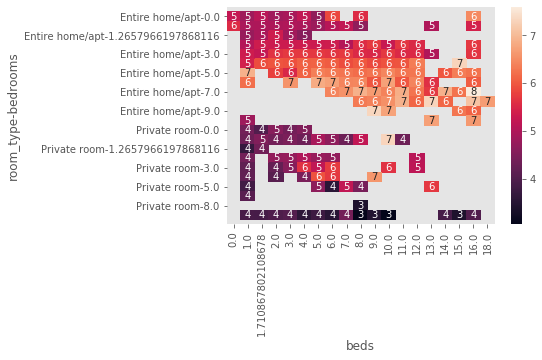

In [35]:
ax = sns.heatmap(Data.groupby(['room_type', 'bedrooms','beds']).log_price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


(3.5, -0.5)

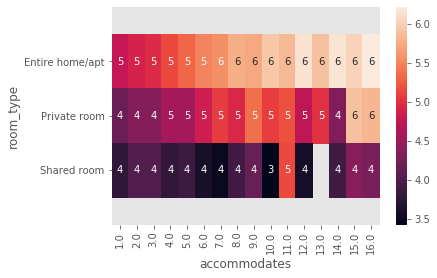

In [36]:

ax = sns.heatmap(Data.groupby(['room_type', 'accommodates']).log_price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


It can be analyzed that with the increase in the number of bedrooms price of listing
 increases. Although, it depends upon the room type as well.

It can be concluded that prices of listings depends upon following factors:

1) The type of room chosen by a traveler plays booking an entire property costs maximum followed by private room and shared apartment.

2) The type of property chosen by the traveler apartments and houses take up an overwhelming majority of all listings.


# OUTLIERS

An outlier is a data point that is distant from other similar points.

Outliers in the data can distort predictions and affect the accuracy so it's important to flag them for review. This is especially the case with regression models.

The challenge with outlier detection is determining if a point is truly a problem or simply a large value. If a point is genuine then it is very important to keep it in the data as otherwise we're removing the most interesting pdata points. Regardless, it is essential to understand their impact on our predictive models and statistics, and the extent to which a small number of outlying points are dominating the fit of the model (for example, the mean is much more sensitive to outliers than the median). It is left to the best judgement of the investigator to decide whether treating outliers is necessary and how to go about it. Knowledge of domain and impact of the business problem tend to drive this decision.

## Accommodates

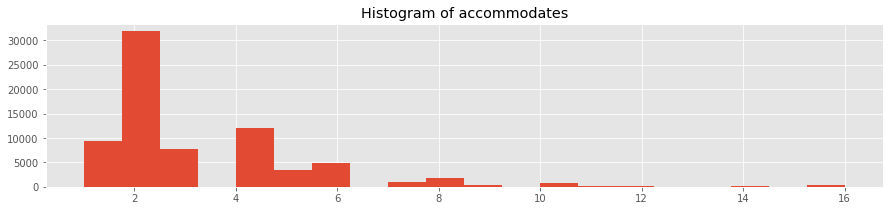

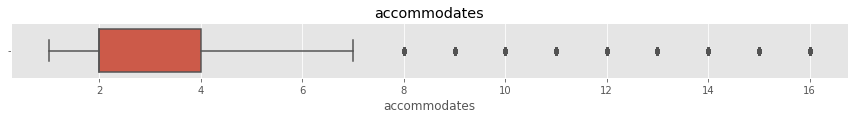

In [37]:
plt.figure(figsize=(15,3))
plt.hist(Data['accommodates'], 20)
plt.title('Histogram of accommodates')
plt.show()

plt.figure(figsize=(15,1))
sns.boxplot(Data['accommodates'])
plt.title('accommodates')
plt.show()

In [38]:
quartiles = np.quantile(Data['accommodates'][Data['accommodates'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_accommodates = Data.loc[np.abs(Data['accommodates'] - Data['accommodates'].median()) > power_4iqr, 'accommodates']
outlier_accommodates

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


306      16.0
457      16.0
482      11.0
569      16.0
642      12.0
         ... 
73669    12.0
73695    12.0
73957    14.0
73980    15.0
74081    16.0
Name: accommodates, Length: 838, dtype: float64

In [39]:
Data.drop(outlier_accommodates.index, axis=0, inplace=True)
Data.shape

(73260, 10)

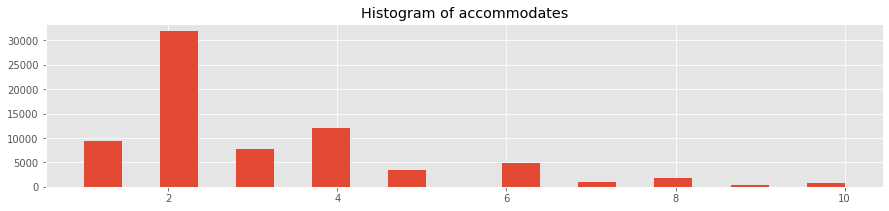

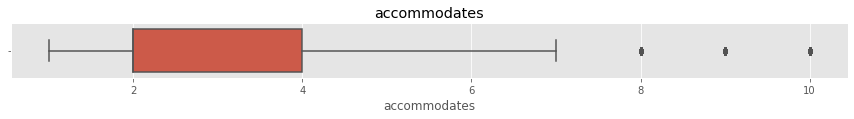

In [40]:
#Plot after outlier removal
plt.figure(figsize=(15,3))
plt.hist(Data['accommodates'], 20)
plt.title('Histogram of accommodates')
plt.show()

plt.figure(figsize=(15,1))
sns.boxplot(Data['accommodates'])
plt.title('accommodates')
plt.show()

Other than accomodates all other visualisation seems to be pretty good and theres no need for outlier removal

# CHECKING FOR MULTICOLLINEARITY

A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

In [41]:
Data1 = Data
Data1.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,0.0,1.0,4.744932


In [42]:
cat_columns= ['room_type', 'cancellation_policy','cleaning_fee',
              'instant_bookable']

def preprocess(df):
    data = df
    for col in cat_columns:
        data[col] = data[col].astype('category').cat.codes
    return data
        
Data1 = preprocess(Data1)
Data1.head()


X = Data.drop(['log_price'], axis=1)
Y = Data['log_price']

from statsmodels.tools.tools import add_constant
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))



Series before feature selection: 

const                  16.497858
id                      1.000075
room_type               1.435551
accommodates            4.086091
bathrooms               1.467228
cancellation_policy     1.156824
cleaning_fee            1.165618
instant_bookable        1.014946
bedrooms                2.342765
beds                    3.134915
dtype: float64



Hence we can see that there is no multicollinearity and our dataset can be applicable for further analysis.


# DATA PREPROCESSING

In [43]:
cat_columns= ['room_type', 'cancellation_policy','cleaning_fee',
              'instant_bookable']
Data[cat_columns] = Data[cat_columns].astype("category")
Data.describe(include = ['category']).T


,count,unique,top,freq
room_type,73260,3,0,40514
cancellation_policy,73260,3,2,31855
cleaning_fee,73260,2,1,53652
instant_bookable,73260,2,0,54057


In [44]:
cat_vars=['room_type', 'cancellation_policy','cleaning_fee','instant_bookable']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(Data[var], prefix=var)
    data=Data.join(cat_list)
    Data=data

# cat_vars=['Hour', 'Month','WeekDay','LocationName']
# data_vars=df.columns.values.tolist()
# to_keep=[i for i in data_vars if i not in cat_vars]

# data_final=df[to_keep]
data = Data
data.columns.values

array(['id', 'room_type', 'accommodates', 'bathrooms',
       'cancellation_policy', 'cleaning_fee', 'instant_bookable',
       'bedrooms', 'beds', 'log_price', 'room_type_0', 'room_type_1',
       'room_type_2', 'cancellation_policy_0', 'cancellation_policy_1',
       'cancellation_policy_2', 'cleaning_fee_0', 'cleaning_fee_1',
       'instant_bookable_0', 'instant_bookable_1'], dtype=object)

In [62]:
data = data[[ 'accommodates', 'bathrooms',
         'bedrooms', 'beds', 'room_type_0', 'room_type_1',
       'room_type_2', 'cancellation_policy_0', 'cancellation_policy_1',
       'cancellation_policy_2', 'cleaning_fee_0', 'cleaning_fee_1',
       'instant_bookable_0', 'instant_bookable_1', 'log_price']]
data.head()

,accommodates,bathrooms,bedrooms,beds,room_type_0,room_type_1,room_type_2,cancellation_policy_0,cancellation_policy_1,cancellation_policy_2,cleaning_fee_0,cleaning_fee_1,instant_bookable_0,instant_bookable_1,log_price
0,3.0,1.0,1.0,1.0,1,0,0,0,0,1,0,1,1,0,5.010635
1,7.0,1.0,3.0,3.0,1,0,0,0,0,1,0,1,0,1,5.129899
2,5.0,1.0,1.0,3.0,1,0,0,0,1,0,0,1,0,1,4.976734
3,4.0,1.0,2.0,2.0,1,0,0,1,0,0,0,1,1,0,6.620073
4,2.0,1.0,0.0,1.0,1,0,0,0,1,0,0,1,0,1,4.744932


def preprocess(df):
    data = df
    for col in cat_columns:
        data[col] = data[col].astype('category').cat.codes
    return data
        
data = preprocess(Data)
data.head()


# MODELLING

In [63]:

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=105)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((65934, 14), (7326, 14), (65934,), (7326,))

In [64]:
print("Linear Reggression")
linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


Linear Reggression
[[3.84 3.22]
 [4.25 4.14]
 [4.94 4.7 ]
 ...
 [4.31 3.95]
 [4.33 3.81]
 [5.26 5.08]]


In [65]:
print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))
### Calculate RMSE
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse1)


R-squared train score: 0.501
R-squared test score: 0.493
0.5053930170471674


Feature: 0, Score: 0.08837
Feature: 1, Score: 0.14381
Feature: 2, Score: 0.15907
Feature: 3, Score: -0.05278
Feature: 4, Score: 0.57468
Feature: 5, Score: -0.05316
Feature: 6, Score: -0.52152
Feature: 7, Score: 0.02448
Feature: 8, Score: -0.03344
Feature: 9, Score: 0.00897
Feature: 10, Score: 0.03455
Feature: 11, Score: -0.03455
Feature: 12, Score: 0.03224
Feature: 13, Score: -0.03224


Text(0.5, 1.0, 'Feature Importance')

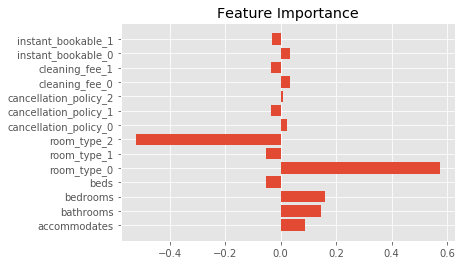

In [67]:
importance = linreg.coef_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
col = ( 'accommodates', 'bathrooms',
         'bedrooms', 'beds', 'room_type_0', 'room_type_1',
       'room_type_2', 'cancellation_policy_0', 'cancellation_policy_1',
       'cancellation_policy_2', 'cleaning_fee_0', 'cleaning_fee_1',
       'instant_bookable_0', 'instant_bookable_1')

plt.barh(col,importance)
plt.title("Feature Importance")



From the above model we obtained an R2 of 0.50, The most common interpretation of r-squared is how well the regression model fits the observed data. For example, an r-squared of 50% reveals that 50% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.
RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
In our case we have an RMSE of 0.50 which is quite good as This produces a value between 0 and 1, where values closer to 0 represent better fitting models.

Room type appeared to be the most significant variable, followed by bedrooms, bathrooms and accomodates.
However, review score rating is the least important variable.

# FINAL FINDINGS

Prices very wildly based on property room types.

Majority of listings are rented for their entirety, although private room is a close second. This is the most important factor when people choose where to stay.

No. of bedrooms, bathrooms and no. of people accommodated are the next most important factors, meaning that most people who use Airbnb travel in groups.

Almost all of listings are apartment or houses.

Cancellation policies are unfairly spread out, Owners are strict with the policies.



# BUSINESS INSIGHTS

instead of putting shared rooms or private rooms for listing, owners must think to put appartment as a whole as it earns more money. The number of bathrooms can also be thought to increase if space can allow.

A little linent cancellation policies will be better for the listed properties.